In [1]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
# import plotly.graph_objs as go
import plotly.graph_objects as go
#import chart_studio.plotly as py

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',50)
pd.set_option('display.width',1000)

In [3]:
rosters_df = pd.read_csv("rosters_df_2021.csv")
rosters_df.info()
rosters_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                1200 non-null   int64  
 1   week                1200 non-null   int64  
 2   owner_team          1200 non-null   object 
 3   owner               1200 non-null   object 
 4   player              1200 non-null   object 
 5   pro_team            1200 non-null   object 
 6   pro_team_abv        1200 non-null   object 
 7   current_inj_status  1112 non-null   object 
 8   lineup_slot_name    1200 non-null   object 
 9   position_name       1200 non-null   object 
 10  proj_points         1197 non-null   float64
 11  actual_points       799 non-null    float64
 12  slot_id             1200 non-null   int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 122.0+ KB


,year,week,proj_points,actual_points,slot_id
count,1200.0,1200.000000,1197.000000,799.000000,1200.000000
mean,2021.0,3.500000,12.621166,12.646683,13.916667
std,0.0,1.708537,7.286224,10.791374,8.069737
min,2021.0,1.000000,0.000000,-6.500000,0.000000
25%,2021.0,2.000000,7.917747,4.000000,4.000000
50%,2021.0,3.500000,12.208149,10.400000,20.000000
75%,2021.0,5.000000,16.853537,19.000000,20.000000
max,2021.0,6.000000,36.206133,58.200000,23.000000


In [3]:
rosters_df.head()

,week,owner_team,owner,player,pro_team,current_inj_status,lineup_slot_name,position_name,proj_points,actual_points,slot_id
0,1,Happy Rock Homewreckers,Blainer,Saquon Barkley,New York Giants,INJURY_RESERVE,RB,RB,21.743497,13.8,2
1,1,Happy Rock Homewreckers,Blainer,Chris Godwin,Tampa Bay Buccaneers,ACTIVE,WR,WR,19.398272,15.0,4
2,1,Happy Rock Homewreckers,Blainer,Joe Mixon,Cincinnati Bengals,INJURY_RESERVE,RB,RB,17.820651,6.8,2
3,1,Happy Rock Homewreckers,Blainer,A.J. Brown,Tennessee Titans,ACTIVE,WR,WR,15.344685,9.2,4
4,1,Happy Rock Homewreckers,Blainer,Mark Andrews,Baltimore Ravens,ACTIVE,TE,TE,14.683060,23.6,6


In [ ]:
test = rosters_df[rosters_df.columns[rosters_df.columns!='Unnamed: 0']].loc[(rosters_df['week'] == 1) & (rosters_df['owner_team'] == 'Happy Rock Homewreckers')]
test

In [4]:
matchups_df = pd.read_csv("matchups_df_2021.csv")
matchups_df.info()
matchups_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   week                 50 non-null     int64  
 1   owner_team_name      50 non-null     object 
 2   owner                50 non-null     object 
 3   score                50 non-null     float64
 4   win                  50 non-null     int64  
 5   opp_owner_team_name  50 non-null     object 
 6   opp_owner            50 non-null     object 
 7   opp_score            50 non-null     float64
dtypes: float64(2), int64(2), object(4)
memory usage: 3.2+ KB


,week,score,win,opp_score
count,50.000000,50.000000,50.000000,50.000000
mean,3.000000,163.482000,0.500000,163.482000
std,1.428571,25.168694,0.505076,25.168694
min,1.000000,103.400000,0.000000,103.400000
25%,2.000000,151.350000,0.000000,151.350000
50%,3.000000,164.400000,0.500000,164.400000
75%,4.000000,174.400000,1.000000,174.400000
max,5.000000,228.900000,1.000000,228.900000


In [5]:
matchups_df.head()

,week,owner_team_name,owner,score,win,opp_owner_team_name,opp_owner,opp_score
0,1,Sticky Icky,T-$,166.6,1,Happy Rock Homewreckers,Blainer,139.2
1,1,Happy Rock Homewreckers,Blainer,139.2,0,Sticky Icky,T-$,166.6
2,1,Bench Don't Kill My Vibe,Padge,190.0,1,Bud Lathrop Drive,Farmer,149.9
3,1,Bud Lathrop Drive,Farmer,149.9,0,Bench Don't Kill My Vibe,Padge,190.0
4,1,Springfield Atoms,Duvi,147.1,0,Pixel Whippers,Sembower,164.8


In [2]:
win_loss_df = pd.read_csv("win_loss_df_2021.csv").sort_values(['wins', 'points_for'], ascending = False)
win_loss_df.info()
win_loss_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 7 to 9
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owner_team_name  10 non-null     object 
 1   wins             10 non-null     int64  
 2   losses           10 non-null     int64  
 3   points_for       10 non-null     float64
 4   points_against   10 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 480.0+ bytes


,wins,losses,points_for,points_against
count,10.000000,10.000000,10.00000,10.000000
mean,6.000000,6.000000,1861.63000,1861.630000
std,1.763834,1.763834,112.83197,115.401137
min,4.000000,3.000000,1736.10000,1706.800000
25%,5.000000,4.500000,1758.17500,1780.125000
50%,5.500000,6.500000,1835.25000,1855.250000
75%,7.500000,7.000000,1977.07500,1927.475000
max,9.000000,8.000000,2015.30000,2047.000000


In [4]:
win_loss_df

,owner_team_name,wins,losses,points_for,points_against
7,Seattle rainier riot,9,3,1996.0,1706.8
8,Springfield Atoms,8,4,1833.2,1766.5
4,CoMo FightinCamlToes,8,4,1757.3,1713.3
2,Brookside Shokunin,6,6,1837.3,1932.6
0,Beacon Hill Posterizers,6,6,1760.8,1846.1
6,Pixel Whippers,5,7,1989.5,1912.1
5,Happy Rock Homewreckers,5,7,1939.8,2006.5
1,Bench Don't Kill My Vibe,5,7,1736.1,1864.4
3,Bud Lathrop Drive,4,8,2015.3,2047.0
9,Sticky Icky,4,8,1751.0,1821.0


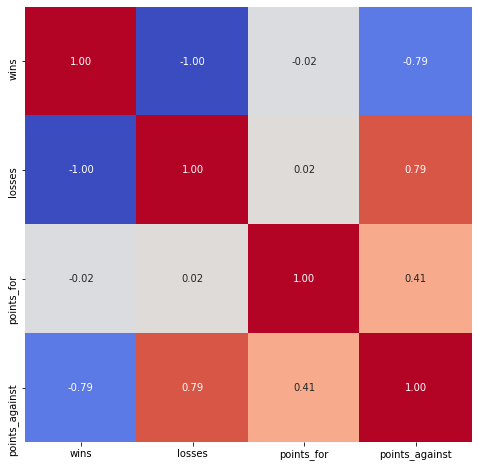

In [6]:
corr = win_loss_df.iloc[:,1:].corr()
fig, ax = plt.subplots(figsize = (8, 8))
g = sns.heatmap(corr, annot = True, fmt = '.2f', cmap = plt.get_cmap('coolwarm'), cbar = False, ax = ax)

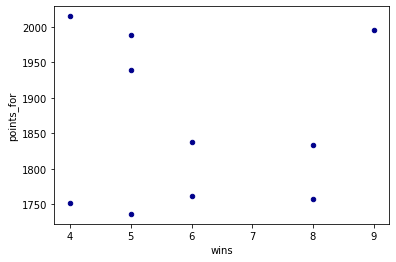

In [7]:
win_loss_df.plot.scatter(x='wins',
                      y='points_for',
                      c='DarkBlue')

In [13]:
fig = px.scatter(win_loss_df, x="wins", y="points_for", trendline="ols")
fig.show()

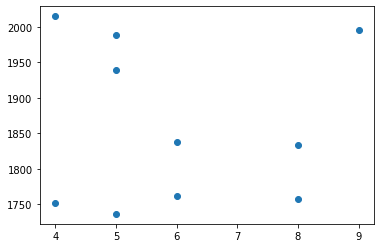

In [18]:
plt.scatter(win_loss_df["wins"], win_loss_df["points_for"])
#plt.plot(win_loss_df["wins"], win_loss_df["points_for"], color='red')
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(win_loss_df["wins"], win_loss_df["points_for"], 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)
plt.show()

Text(0, 0.5, 'Points For')

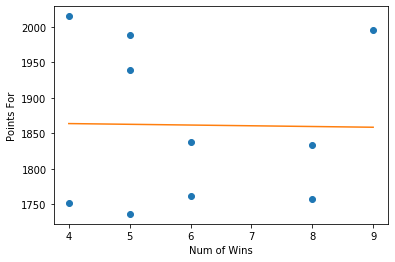

In [20]:
#create basic scatterplot
plt.plot(win_loss_df["wins"], win_loss_df["points_for"], 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(win_loss_df["wins"], win_loss_df["points_for"], 1)

#add linear regression line to scatterplot 
plt.plot(win_loss_df["wins"], m*win_loss_df["wins"]+b)

plt.xlabel('Num of Wins')
plt.ylabel('Points For')

In [ ]:
def corr_matrix(data):
    columns = [col for col in data.columns if is_numeric_dtype(data[col])]
    
    if len(columns) != 0:
        
        # create a correlation matrix for all numerical columns and export to csv
        corr = data.corr()
        
#         # save to cvs
#         corr.to_csv(output_dir + '/{}_correlation_analysis.csv'.format(file_name), index = True)
        
        # display heatmap if the columns are less than or equal 10, otherwise, the heatmap is too big to easily read within notebook
        if len(columns) <= 10:
            
            # create a correlation matrix with a heatmap and export to png
            fig, ax = plt.subplots(figsize = (8, 8))
            g = sns.heatmap(corr, annot = True, fmt = '.2f', cmap = plt.get_cmap('coolwarm'), cbar = False, ax = ax)
#             plt.savefig(output_dir + '{}_correlation_analysis.png'.format(file_name), bbox_inches='tight', pad_inches=0.0)
    else: 
        print("no numerical columns")

In [ ]:
#import pickle 
win_loss_df.to_pickle("win_loss_df.pkl")

In [7]:
# plotly line plot
#plt.style.use('fivethirtyeight')

fig = px.line(matchups_df, x="week", y="score", 
              color = 'owner_team_name', 
              title='Score per Week',
              hover_name='owner_team_name', 
              hover_data={"week" : False,
                          'owner_team_name' : False,
                          'score' : True
                         },
              template = 'plotly_dark'
             )
fig.update_xaxes(range=[matchups_df['week'].min() - 0.25, matchups_df['week'].max() + 0.25], dtick=1)
#fig.update_traces(mode="markers+lines")
#fig.update_layout(hovermode="x unified")
#fig.update_layout(hoverlabel=dict(bgcolor="white", font_size=16, font_family="Rockwell"))

fig.show()

In [8]:
#plotly line plot
fig = px.line(matchups_df, x="week", y="score", color = 'owner_team_name', title='Score per Week')
fig.update_xaxes(range=[matchups_df['week'].min() - 0.25, matchups_df['week'].max() + 0.25], dtick=1)
fig.layout.update(showlegend=False)
fig.show()

In [14]:
fig = go.Figure(data=go.Scatter(x = matchups_df['week'], y = matchups_df['score'], mode = 'markers',
                                marker_color = matchups_df['owner_team_name'], text = matchups_df['owner_team_name']
                               ))
fig.show()

ValueError: 
    Invalid element(s) received for the 'color' property of scatter.marker
        Invalid elements include: ['Sticky Icky', 'Happy Rock Homewreckers', "Bench Don't Kill My Vibe", 'Bud Lathrop Drive', 'Springfield Atoms', 'Pixel Whippers', 'Seattle rainier riot', 'Beacon Hill Posterizers', 'Brookside Shokunin', 'CoMo FightinCamlToes']

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen
      - A number that will be interpreted as a color
        according to scatter.marker.colorscale
      - A list or array of any of the above

In [ ]:
fig = px.bar(win_loss_df, x='owner_team_name', y='wins', color = 'owner_team_name')
fig.show()

In [ ]:
fig = px.bar(win_loss_df, x='owner_team_name', y='wins', color = 'owner_team_name')
#fig2 = px.bar(win_loss_df, x='owner_team_name', y='losses', color = 'owner_team_name')
fig.add_bar(x=win_loss_df['owner_team_name'], y=win_loss_df['losses'], marker=color)
#fig.add_trace(fig2.data[1])
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(win_loss_df, x='owner_team_name', y='wins', marker_color='owner_team_id'))
fig.show()

In [8]:
fig = go.Figure()

fig.add_trace(go.Bar(x=win_loss_df['owner_team_name'], y=win_loss_df['wins'],
                base=0,
                #name = 
                #marker_color=win_loss_df['owner_team_id'],
                marker={'color': colors[label]},
                ))
fig.add_trace(go.Bar(x=win_loss_df['owner_team_name'], y=win_loss_df['losses'],
                base= -1 * win_loss_df['losses'],
                text = [1, 2, 3, 4],
                marker_color=win_loss_df['owner_team_id']
                ))

fig.show()

#layout = go.Layout(yaxis=go.layout.YAxis(title='Wins/Losses'),
#                   xaxis=go.layout.XAxis(title='team_id'),
#                   barmode='overlay',
#                   bargap=0.1)



NameError: name 'colors' is not defined

In [ ]:
win_loss_df['owner_team_name']

In [ ]:
colors = {'Brookside Shokunin': 'red',
          'Beacon Hill Posterizers': 'orange',
          'Seattle rainier riot': 'lightgreen',
          'Sticky Icky': 'darkgreen',
          'Pixel Whippers': 'red',
          'Bud Lathrop Drive': 'orange',
          'Springfield Atoms': 'lightgreen',
          'CoMo FightinCamlToes': 'darkgreen',
          'Happy Rock Homewreckers': 'lightgreen',
          "Bench Don't Kill My Vibe": 'darkgreen'
         }

label = win_loss_df['owner_team_name'].tolist()
label

In [15]:
fig = go.Figure()

fig.add_trace(go.Bar(x=win_loss_df['owner_team_name'], y=win_loss_df['wins'],
                base=0,
                marker_color='green',
                name='Wins',
                hoverinfo='y'
                ))
fig.add_trace(go.Bar(x=win_loss_df['owner_team_name'], y=win_loss_df['losses'],
                base= -1 * win_loss_df['losses'].astype('int'),
                text = 1 * win_loss_df['losses'].astype('int'),
                marker_color='red',
                name='Losses',
                hoverinfo='text'
                ))

# fig.update_yaxes(tickvals=[5, 0, -5], ticktext = [5, 0, 5])
# fig.layout.update(barmode = 'overlay', 
#                   hovermode = 'x',
#                   title = 'Wins/Losses'
# )

fig.layout.update(barmode = 'overlay', 
                  hovermode = 'x',
                  title = 'Wins/Losses',
                  yaxis_range=[-10,10],
                  yaxis = dict(tickvals = [10, 5, 3, 0, -3, -5, -10], ticktext = [10, 5, 3, 0, 3, 5, 10])
                 )

# # fig.update_yaxes(tickvals=[5, 0, -5], ticktext = [5, 0, 5])
# fig.layout_update(barmode = 'overlay', 
#                   hovermode = 'x',
#                   title = 'Wins/Losses',
#                   yaxis = dict(tickvals = [5, 0, -5], ticktext = [5, 0, 5])
#                  )
                  


fig.show()

In [16]:
fig = go.Figure()

fig.add_trace(go.Bar(x=win_loss_df['owner_team_name'], y=win_loss_df['points_for'],
                base=0,
                marker_color='green',
                name='points_for',
                hoverinfo='y'
                ))
fig.add_trace(go.Bar(x=win_loss_df['owner_team_name'], y=win_loss_df['points_against'],
                base= -1 * win_loss_df['points_against'].astype('int'),
                text = 1 * win_loss_df['points_against'].astype('int'),
                marker_color='red',
                name='points_against',
                hoverinfo='text'
                ))

fig.update_yaxes(tickvals=[3000, 2000, 1000, 0, -1000, -2000, -3000] , ticktext = [3000, 2000, 1000, 0, 1000, 2000, 3000])
fig.layout.update(barmode = 'overlay', 
                  hovermode = 'x',
                  title = 'points_for/points_against'
)
fig.show()

In [ ]:
fig = px.bar(rosters_df.loc[rosters_df['week'] == 1].sort_values('actual_points', ascending = False).head(20), x="player", 
              y="actual_points", color = 'player', title='Actual Points per Week')
fig.layout.update(showlegend = False)
fig.show()

In [ ]:
fig = px.bar(rosters_df.loc[rosters_df['week'] == 1].sort_values('proj_points', ascending = False).head(20), x="player", 
              y="proj_points", color = 'player', title='Projected Points per Week')
fig.layout.update(showlegend = False)
fig.show()